In [11]:
import cv2
import numpy as np
from utils.show import *

# Sparse - Lucas-Kanade method on predicted masks

In [21]:
def lucas_kanade_method(video_path):
    # Read the video
    cap = cv2.VideoCapture(video_path)
    for i in range(300):
        ret, frame = cap.read()
    # Parameters for ShiTomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
    # Parameters for Lucas Kanade optical flow
    lk_params = dict(
        winSize=(15, 15),
        maxLevel=2,
        criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
    )
    # Create random colors
    color = np.random.randint(0, 255, (100, 3))
 # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
 # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)
    stored_points = []

    # while True:
    for i in range(100):
    # Read new frame
        ret, frame = cap.read()
        if not ret:
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculate Optical Flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(
            old_gray, frame_gray, p0, None, **lk_params
        )
        # Select good points
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        # Display the
        # show(frame, mask, cv2.add(frame, mask))
        img = cv2.add(frame, mask)

        # Update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)


(array([262.8713 , 340.20853], dtype=float32), array([260., 331.], dtype=float32)) (array([371.66837 ,  25.782074], dtype=float32), array([376.,  19.], dtype=float32)) (array([556.7837, 257.9299], dtype=float32), array([561., 251.], dtype=float32)) (array([732.766  , 133.54512], dtype=float32), array([735., 128.], dtype=float32)) (array([129.0592 , 262.36523], dtype=float32), array([134., 255.], dtype=float32)) (array([492.57098, 110.74017], dtype=float32), array([496., 102.], dtype=float32)) (array([384.0749 , 316.31052], dtype=float32), array([389., 309.], dtype=float32)) (array([148.8578  ,  55.181564], dtype=float32), array([153.,  47.], dtype=float32)) (array([407.4437  ,  10.765105], dtype=float32), array([411.,   4.], dtype=float32)) (array([561.4639 , 173.42773], dtype=float32), array([566., 164.], dtype=float32)) (array([157.95578, 284.8369 ], dtype=float32), array([160., 278.], dtype=float32)) (array([354.3311  ,  33.131367], dtype=float32), array([359.,  26.], dtype=float32)

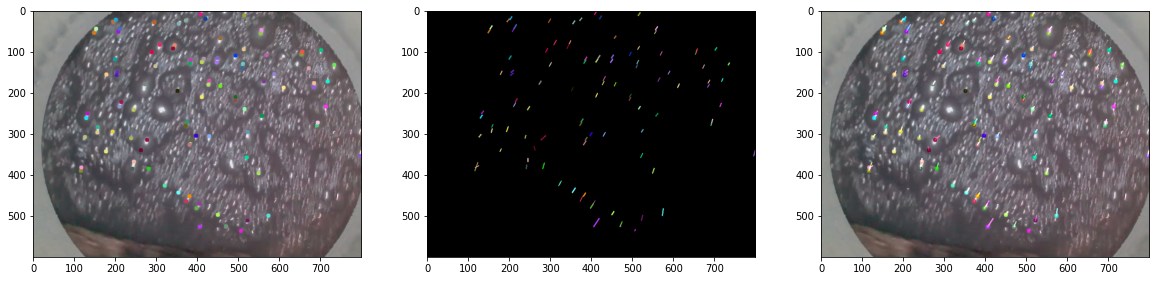

[[262.8713    340.20853  ]
 [371.66837    25.782074 ]
 [556.7837    257.9299   ]
 [732.766     133.54512  ]
 [129.0592    262.36523  ]
 [492.57098   110.74017  ]
 [384.0749    316.31052  ]
 [148.8578     55.181564 ]
 [407.4437     10.765105 ]
 [561.4639    173.42773  ]
 [157.95578   284.8369   ]
 [354.3311     33.131367 ]
 [469.92044   525.28674  ]
 [371.61096   280.57477  ]
 [288.26727   102.436066 ]
 [308.67148    84.06984  ]
 [295.1901     30.494173 ]
 [204.06226   151.34923  ]
 [670.7551    141.17674  ]
 [700.40796    97.56273  ]
 [448.70596   116.24382  ]
 [428.65173   306.92126  ]
 [193.18102   295.91257  ]
 [210.01787   234.50662  ]
 [380.67572   452.7281   ]
 [553.4502     57.66389  ]
 [245.57286   368.75946  ]
 [277.86176   315.6875   ]
 [410.96744   126.76802  ]
 [586.78925   155.85402  ]
 [512.5197     95.43925  ]
 [281.92993   385.8245   ]
 [132.28781   251.07326  ]
 [652.1521    107.88383  ]
 [116.90377   390.66855  ]
 [455.91425    68.40779  ]
 [521.68726   296.1363   ]
 

In [22]:
lucas_kanade_method('/Users/s70c3/Projects/Nornikel-project/NornilFroathOpticalFlow/data/90_1_7.mp4')